**Taylor Stanley**

**tcastanley@gmail.com**

**Mod 3 Project - Tanzanian Water Pump Analysis**

# Import Data

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("original_datasets/Test Set Values.csv") 
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### Missing Data Observations

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

**There will likely be a lot of dummy features required as there is an overwhelming amount of object features in this dataset. I think reducing the features on this dataset may be necessary.  Will look for redundant and informative features below.**

**Features with missing values**

1. funder ~4k

2. installer ~4k (maybe same as funder)

3. subvillage ~370

4. public_meeting ~3.4k

5. scheme_management ~4k

6. scheme_name ~28k

7. permit ~3k

In [177]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


**Features with outliers**

1. amount_tsh
2. population

### Top 5 Values Analysis

In [178]:
for col in df.columns:
    print('-------------------------')
    print('Top 10 Values for:', col)
    print('Number of unique values:', df[col].nunique())
    print(df[col].value_counts(dropna=False).head(10))
    print('-------------------------')

-------------------------
Top 10 Values for: id
Number of unique values: 14850
4094     1
39654    1
35588    1
58105    1
27384    1
70391    1
33525    1
68340    1
15090    1
41786    1
Name: id, dtype: int64
-------------------------
-------------------------
Top 10 Values for: amount_tsh
Number of unique values: 68
0.0       10410
500.0       772
50.0        631
1000.0      370
20.0        349
200.0       296
100.0       218
10.0        189
30.0        186
2000.0      178
Name: amount_tsh, dtype: int64
-------------------------
-------------------------
Top 10 Values for: date_recorded
Number of unique values: 331
2013-02-03    138
2011-03-17    137
2011-03-16    137
2011-03-18    130
2011-03-14    129
2011-03-15    122
2013-01-23    119
2011-03-12    114
2013-01-30    112
2013-01-29    111
Name: date_recorded, dtype: int64
-------------------------
-------------------------
Top 10 Values for: funder
Number of unique values: 980
Government Of Tanzania    2215
NaN                  

# Feature Engineering

## id Duplicates? Correlations?

In [179]:
df.sort_values('id').head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3402,10,0.0,2011-03-13,Roman Catholic,197,DWE,38.790694,-5.113207,Nairobi,0,Pangani,Kicheba,Tanga,4,3,Muheza,Kicheba,250,True,GeoData Consultants Ltd,VWC,Mabula mountains spr,False,1999,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14136,13,0.0,2013-02-08,Tasaf,803,TASAF,36.905545,-10.765602,none,0,Ruvuma / Southern Coast,Mkasale,Ruvuma,10,1,Tunduru,Namwinyu,1,False,GeoData Consultants Ltd,VWC,NaN,False,2009,other - swn 81,other handpump,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
5702,14,0.0,2013-03-27,Government Of Tanzania,1804,DWE,36.570357,-3.251609,Sukumeni,0,Pangani,Sukumeni,Arusha,2,2,Arusha Rural,Mwandeti,200,True,GeoData Consultants Ltd,VWC,Olkokola mwandet pipe line,True,1980,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,cattle trough,cattle trough
11739,29,0.0,2011-04-11,Water,0,Commu,35.882325,-6.067613,Kwa Molen,0,Wami / Ruvu,Kawawa,Dodoma,1,5,Dodoma Urban,Nzuguni,0,True,GeoData Consultants Ltd,VWC,Maho,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
785,32,0.0,2011-07-27,Kyela Council,0,DWE,33.886334,-9.457260,Kwa Albert Mwaikombe,0,Lake Nyasa,Tukuyu,Mbeya,12,3,Kyela,Ipinda,0,True,GeoData Consultants Ltd,VWC,Kanga water supplied scheme,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6376,37,0.0,2011-11-03,Rc,2223,RC,34.426782,-9.297329,Makumbusho Mwinuka,0,Lake Nyasa,Mmbala,Iringa,11,4,Njombe,Igosi,50,True,GeoData Consultants Ltd,VWC,Moronga,True,1996,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
405,47,0.0,2011-08-20,Rudep,1547,DWE,31.985216,-8.796667,Shamba La Shule Legeza Mwendo,0,Lake Rukwa,Chiondo,Rukwa,15,2,Sumbawanga Rural,Legezamwendo,400,True,GeoData Consultants Ltd,VWC,NaN,False,1985,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
114,53,50.0,2013-04-04,Government Of Tanzania,1414,DWE,36.674327,-3.357425,Kwa Linda Noa,0,Pangani,Sakei,Arusha,2,2,Arusha Rural,Kiranyi,200,True,GeoData Consultants Ltd,VWC,Nabai pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
5869,57,0.0,2011-07-17,Government Of Tanzania,0,DWE,32.914140,-2.590667,Majalubani,0,Lake Victoria,Nyamalango B,Mwanza,19,3,Ilemela,Butimba,0,True,GeoData Consultants Ltd,VWC,none,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4105,58,0.0,2013-02-13,NaN,1514,NaN,34.681520,-5.062091,Ihanja Secondary,0,Internal,Junjuhu,Singida,13,2,Singida Rural,Ihanja,1,True,GeoData Consultants Ltd,VWC,NaN,NaN,1990,other,other,other,vwc,user-group,never pay,never pay,unknown,unknown,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


**No correlation seems to exist regarding the logic of the id codes, will drop later as they are all also unique.**

## Multicollinearity check!

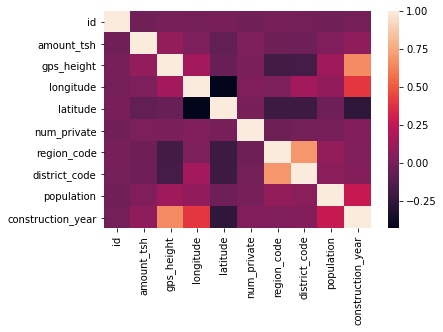

In [180]:
sns.heatmap(df.corr())

In [181]:
df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.016012,0.002711,-0.003331,0.009632,-0.016040,0.002601,-0.000655,-0.016068,-0.004591
amount_tsh,-0.016012,1.000000,0.096230,0.027709,-0.072210,0.022978,-0.028887,-0.027391,0.028657,0.086236
gps_height,0.002711,0.096230,1.000000,0.148722,-0.045028,0.013331,-0.177832,-0.169586,0.131994,0.656781
longitude,-0.003331,0.027709,0.148722,1.000000,-0.430001,0.030979,0.024354,0.148962,0.090862,0.397361
latitude,0.009632,-0.072210,-0.045028,-0.430001,1.000000,0.002048,-0.203080,-0.196176,-0.024123,-0.256610
num_private,-0.016040,0.022978,0.013331,0.030979,0.002048,1.000000,-0.028188,-0.010341,0.001517,0.036118
region_code,0.002601,-0.028887,-0.177832,0.024354,-0.203080,-0.028188,1.000000,0.687910,0.097118,0.029993
district_code,-0.000655,-0.027391,-0.169586,0.148962,-0.196176,-0.010341,0.687910,1.000000,0.066425,0.046214
population,-0.016068,0.028657,0.131994,0.090862,-0.024123,0.001517,0.097118,0.066425,1.000000,0.272421
construction_year,-0.004591,0.086236,0.656781,0.397361,-0.256610,0.036118,0.029993,0.046214,0.272421,1.000000


**Seems all good so far. Will check again later after manipulating and adding some features.**

## Date Conversion to Year & Month

**Here I am going to create a simple 'year_recorded' & 'month_recorded' feature to make visualizations easier to investigate.  If there exists any relationship with the status of the pumps compared with the year they were investigated or the time of year, then this should help to make that clearer.**

In [182]:
df['year_recorded'] = pd.to_datetime(df['date_recorded']).dt.year
# df['month_recorded'] = pd.to_datetime(df['date_recorded']).dt.month
df['year_recorded'] = df['year_recorded']
# df['month_recorded'] = df['month_recorded']
df = df.drop('date_recorded', axis=1)
print('Number of Years Recording:', df['year_recorded'].nunique())
# print('Number of Months Recorded in:', df['month_recorded'].nunique())
print('-------------------------------')
df.info()

Number of Years Recording: 5
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64 

## Replace Construction Feature w/ Years Since & Add Known or Unknown

In [183]:
df['yrs_in_operation'] = -1 * (df['construction_year'] - df['year_recorded'])
df['yrs_in_operation'] = df['yrs_in_operation'].map(lambda x: 0 if x > 100 else x)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,yrs_in_operation
0,50785,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013,1
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013,13
2,17168,0.0,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,2013,3
3,45559,0.0,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,2013,26
4,49871,500.0,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,13


In [184]:
df['construction_yr_known'] = df['construction_year'].map(lambda x: 'No' if x == 0 else 'Yes')
df = df.drop(['construction_year', 'year_recorded'], axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,yrs_in_operation,construction_yr_known
0,50785,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,1,Yes
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes
2,17168,0.0,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,3,Yes
3,45559,0.0,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,26,Yes
4,49871,500.0,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes


## Change Quality & Quantity to Binary Variables

In [185]:
df['water_quality'].value_counts()

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64

In [186]:
df['good_water'] = df['water_quality'].map(lambda x: 'Yes' if x == 'soft' else 'No')
df = df.drop('water_quality', axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,yrs_in_operation,construction_yr_known,good_water
0,50785,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,other,other,other,parastatal,parastatal,never pay,never pay,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,1,Yes,Yes
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes,Yes
2,17168,0.0,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,other,other,other,vwc,user-group,never pay,never pay,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,3,Yes,Yes
3,45559,0.0,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,other,other,other,vwc,user-group,unknown,unknown,good,dry,dry,shallow well,shallow well,groundwater,other,other,26,Yes,Yes
4,49871,500.0,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes,Yes


In [187]:
df['quantity'].value_counts(dropna=False)

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

In [188]:
df['enough_water'] = df['quantity'].map(lambda x: 'Yes' if x == 'enough' else 'No')
df = df.drop('quantity', axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,yrs_in_operation,construction_yr_known,good_water,enough_water
0,50785,0.0,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,other,other,other,parastatal,parastatal,never pay,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,1,Yes,Yes,No
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes,Yes,No
2,17168,0.0,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,other,other,other,vwc,user-group,never pay,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,3,Yes,Yes,No
3,45559,0.0,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,other,other,other,vwc,user-group,unknown,unknown,good,dry,shallow well,shallow well,groundwater,other,other,26,Yes,Yes,No
4,49871,500.0,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes,Yes,Yes


## Payment - Free or not?

In [189]:
df['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay when scheme fails     928
pay annually              928
other                     260
Name: payment, dtype: int64

In [190]:
df['payment'] = df['payment'].map(lambda x: 'Free' if x == 'never pay' else ('unknown' if x == 'unknown' else 'Yes'))
df = df.rename(columns={'payment':'payment_required'})
df['payment_required'].value_counts()

Yes        6494
Free       6364
unknown    1992
Name: payment_required, dtype: int64

## Interpolating Median GPS Height

In [191]:
df['district_code'].value_counts(dropna=False)

1     3096
2     2756
3     2523
4     2254
5     1072
6     1034
7      823
30     261
8      239
33     189
53     176
43     148
13     105
63      69
23      67
62      18
60      13
0        4
67       2
80       1
Name: district_code, dtype: int64

In [192]:
df.groupby('district_code')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
0,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1,3096.0,682.376615,653.398532,-50.0,0.00,543.5,1304.00,2187.0
2,2756.0,816.312409,696.332719,-8.0,0.00,986.0,1478.25,2216.0
3,2523.0,628.912802,699.028546,-47.0,0.00,292.0,1230.50,2576.0
4,2254.0,846.448980,774.425986,-37.0,0.00,864.5,1557.75,2419.0
5,1072.0,629.763993,672.031097,-44.0,0.00,542.5,1227.25,2777.0
6,1034.0,326.581238,498.063977,-40.0,0.00,0.0,453.50,2228.0
7,823.0,721.023086,705.934876,0.0,0.00,1004.0,1361.00,2230.0
8,239.0,15.121339,134.423598,0.0,0.00,0.0,0.00,1237.0


**Let's go ahead here and drop districts 0 & 80 as they have no useful information for this feature and do not allow for this method to work.**

In [193]:
# df = df[(df['district_code'] != 0) & (df['district_code'] != 80)]
df = df.reset_index(drop=True)
df.groupby('district_code')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
0,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1,3096.0,682.376615,653.398532,-50.0,0.00,543.5,1304.00,2187.0
2,2756.0,816.312409,696.332719,-8.0,0.00,986.0,1478.25,2216.0
3,2523.0,628.912802,699.028546,-47.0,0.00,292.0,1230.50,2576.0
4,2254.0,846.448980,774.425986,-37.0,0.00,864.5,1557.75,2419.0
5,1072.0,629.763993,672.031097,-44.0,0.00,542.5,1227.25,2777.0
6,1034.0,326.581238,498.063977,-40.0,0.00,0.0,453.50,2228.0
7,823.0,721.023086,705.934876,0.0,0.00,1004.0,1361.00,2230.0
8,239.0,15.121339,134.423598,0.0,0.00,0.0,0.00,1237.0


**Okay now let's get the median height for each district, using the values from the df without any 0's.**

In [194]:
df_district = df.groupby('district_code').agg(['mean', 'median'])
df_district

id            amount_tsh         gps_height          longitude              latitude            num_private        region_code         population        yrs_in_operation       
                       mean   median         mean median        mean  median       mean     median       mean     median        mean median        mean median        mean median             mean median
district_code                                                                                                                                                                                            
0              31263.000000  34934.5     0.000000    0.0    0.000000     0.0  36.655865  36.674466  -6.447832  -6.428608    0.000000      0    1.000000      1    0.000000    0.0         0.000000    0.0
1              36910.348514  36879.0   420.738049    0.0  682.376615   543.5  32.151408  35.473432  -4.870553  -4.627011    0.776486      0   13.551357     13  190.284561    1.5        10.026809    5.0
2              37386.832366  37452.5   450.310958    0.0  816.312409   986.0  33.857631  34.727443  -4.975930  -4.511078    0.412917      0   12.087808     13  240.472061  100.0        11.235849    7.0
3              36670.462941  36729.0   288.111455    0.0  628.912802   292.0  34.625377  34.228712  -6.271137  -5.294596    0.088387      0   11.239001     12  169.231470   48.0         9.438763    4.0
4              37237.112689  37502.5   392.724490    0.0  846.448980   864.5  34.979028  34.715507  -6.732730  -8.669811    0.020852      0   10.744898     11  134.885537   28.5        11.036823    4.0
5              37383.770522  37774.5   209.985541    0.0  629.763993   542.5  35.329386  35.772182  -6.222056  -5.710534    0.339552      0    9.756530     10  170.709888   42.5         8.198694    3.0
6              37675.524178  37769.0    48.774662    0.0  326.581238     0.0  31.217671  34.181409  -5.047314  -5.531218    1.627660      0   10.676983     12  120.732108    0.0         6.257253    0.0
7              37219.436209  38121.0   300.911300    0.0  721.023086  1004.0  35.356691  36.110780  -4.701443  -3.357348    0.002430      0    8.795869     11  112.991495    1.0         6.835966    2.0
8              37342.158996  38397.0    68.744770    0.0   15.121339     0.0  34.474573  33.628622  -3.588141  -3.570050    0.995816      0   14.217573     17   84.644351    0.0         4.405858    0.0
13             40607.533333  40433.0     8.666667    0.0   79.476190    34.0  39.145966  39.153660  -8.765210  -8.581511    0.000000      0   80.000000     80  365.504762  340.0        16.409524   16.0
23             35323.940299  32739.0    61.492537   20.0  105.104478    84.0  39.529255  39.480205 -10.085737 -10.168607    0.000000      0   80.000000     80  184.134328    1.0        10.671642    7.0
30             38692.371648  38903.0   109.137931    0.0  426.739464     0.0  32.118565  30.709804  -2.808737  -2.680202    0.000000      0   19.747126     18  101.413793    0.0         3.130268    0.0
33             38921.476190  39962.0    82.989418    0.0  364.592593   341.0  39.010373  39.010374 -10.229751 -10.744669    0.000000      0   85.555556     90  195.423280    1.0        19.121693   18.0
43             36501.797297  35666.5    40.878378    0.0  182.195946    76.5  38.801344  39.108106  -8.054059  -7.215077    0.182432      0   66.891892     60  963.020270  350.0        10.635135    5.0
53             34712.812500  33430.5    40.000000    0.0  125.159091   111.5  38.935344  38.973602  -8.590930  -7.953103    0.215909      0   66.477273     60  324.170455    1.0        12.278409    6.0
60             38972.076923  44561.0  2693.846154    0.0  -20.769231   -20.0  39.679439  39.663924  -7.930462  -7.919298    0.000000      0   60.000000     60  140.000000   25.0         0.000000    0.0
62             32703.666667  30088.5    26.111111    0.0   21.888889    17.0  39.613236  39.601092 -10.013417 -10.026587    0.000000      0   80.000000     80  324.444444  250.0        10

**Save the relevant data in a list**

In [195]:
median_height_district_list = df_district['gps_height']['median']
median_height_district_list

district_code
0        0.0
1      543.5
2      986.0
3      292.0
4      864.5
5      542.5
6        0.0
7     1004.0
8        0.0
13      34.0
23      84.0
30       0.0
33     341.0
43      76.5
53     111.5
60     -20.0
62      17.0
63     317.0
67     -19.5
80       0.0
Name: median, dtype: float64

**Get the ids of pumps with no GPS data and save in another list**

In [196]:
missing_gps_idx_list = df.index
missing_gps_idx_list

RangeIndex(start=0, stop=14850, step=1)

**Iterate through the list of ids and change the GPS height value to the districts median.**

In [197]:
for idx in missing_gps_idx_list:
#     print(idx)
    loc = df.iloc[idx]['district_code']
    new_num = median_height_district_list[loc]
    df.iloc[idx, df.columns.get_loc('gps_height')] = new_num
#     print(df.iloc[idx, df.columns.get_loc('gps_height')])

In [198]:
df['gps_height'].describe()

count    14850.000000
mean       580.452256
std        335.148613
min        -20.000000
25%        292.000000
50%        543.500000
75%        864.500000
max       1004.000000
Name: gps_height, dtype: float64

## Management Group Change

In [199]:
df['management_group'].value_counts()

user-group    13048
commercial      953
parastatal      461
other           266
unknown         122
Name: management_group, dtype: int64

In [200]:
df['management'].value_counts()

vwc                 10117
wug                  1593
water board           755
wua                   583
private operator      533
parastatal            461
other                 239
water authority       219
company               174
unknown               122
other - school         27
trust                  27
Name: management, dtype: int64

**Ok, so we will drop Management as the categories can likely fit nicely within Management_group**

In [201]:
df['management_group'] = df['management_group'].map(lambda x: 'other' if x == 'unknown' else x)
df = df.drop('management', axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management_group,payment_required,payment_type,quality_group,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,yrs_in_operation,construction_yr_known,good_water,enough_water
0,50785,0.0,Dmdd,292.0,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,other,other,other,parastatal,Free,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,1,Yes,Yes,No
1,51630,0.0,Government Of Tanzania,986.0,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,gravity,gravity,gravity,user-group,Free,never pay,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes,Yes,No
2,17168,0.0,NaN,986.0,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,other,other,other,user-group,Free,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,3,Yes,Yes,No
3,45559,0.0,Finn Water,76.5,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,other,other,other,user-group,unknown,unknown,good,dry,shallow well,shallow well,groundwater,other,other,26,Yes,Yes,No
4,49871,500.0,Bruder,292.0,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,gravity,gravity,gravity,user-group,Yes,monthly,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,13,Yes,Yes,Yes


# Feature Cleaning

## Feature Dropping

**These features to be dropped did not seem to provide any additional information for analysis. They were either objectively uninformative, or redundant and provided less information than another feature already in the dataset.**

**Features to drop**

1. wpt_name - Too many to bin, no big players
2. num_private - No information, 98% missing
3. subvillage - Too many to bin, no big players
4. recorded_by - No information
5. scheme_name - 47% NaN values, and too many to bin with no big players
6. extraction_type_group - Redundant 
7. payment_type - Redundant -> payment
8. quality_group - Redundant as water_quality has a bit more detail
9. quantity_group - Redundant ->  quantity
10. source - Redundant as source has a bit more detail
11. waterpoint_type_group - Redundant as waterpoint_type has a bit more detail
12. ward - Too many to bin, no big players
13. region_code - Redundant -> region
14. district_code - Redundant -> region
15. lga - Redundant -> region
16. id - No duplicates

In [202]:
df = df.drop(['wpt_name',
                      'num_private',
                      'subvillage',
                      'recorded_by',
                      'scheme_name',
                      'extraction_type',
                      'extraction_type_group',
                      'payment_type',
                      'quality_group',
                      'quantity_group',
                      'source',
                      'waterpoint_type_group',
                      'ward',
                      'region_code',
                      'district_code',
                      'lga'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  float64
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   basin                  14850 non-null  object 
 8   region                 14850 non-null  object 
 9   population             14850 non-null  int64  
 10  public_meeting         14029 non-null  object 
 11  scheme_management      13881 non-null  object 
 12  permit                 14113 non-null  object 
 13  extraction_type_class  14850 non-null  object 
 14  management_group       14850 non-null  object 
 15  pa

**Features that need to be cleaned**

1. date_recorded - replace with year/month_recorded for easier data exploration/categorization
2. funder - Choose top 10
3. Installer - Clean 0's and choose top 10
5. construction_year - Missing 34% of data, replace 0's with 'Other' and create decade bins
6. public_meeting ~3.4k
7. scheme_management ~4k
8. permit ~3k
9. lat/long ~3k are 0

## Top 10 Funders - Complete

**I suspect that there is value in knowing who funded the construction of each water pump.  Therefore, I will choose the top 5 funders and create dummy features for them, afterwards dropping the original feature.** 

In [203]:
df['funder'].value_counts().head(10)

Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
Rwssp                      329
World Vision               316
Unicef                     267
Tasaf                      259
Dhv                        236
Name: funder, dtype: int64

In [204]:
for i in df.funder.value_counts().index[:10]:
        df['{}_fund'.format(i.replace(" ", "_"))] = (df.funder == i).astype(int)
df = df.drop('funder', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14850 non-null  int64  
 1   amount_tsh                   14850 non-null  float64
 2   gps_height                   14850 non-null  float64
 3   installer                    13973 non-null  object 
 4   longitude                    14850 non-null  float64
 5   latitude                     14850 non-null  float64
 6   basin                        14850 non-null  object 
 7   region                       14850 non-null  object 
 8   population                   14850 non-null  int64  
 9   public_meeting               14029 non-null  object 
 10  scheme_management            13881 non-null  object 
 11  permit                       14113 non-null  object 
 12  extraction_type_class        14850 non-null  object 
 13  management_group

## Top 10 Installers - Complete

**I also suspect that there is value in knowing who installed each water pump.  Therefore, I will choose the top 5 installers and create dummy features for them, afterwards dropping the original feature.** 

In [205]:
df['installer'].value_counts().head(10)

DWE           4349
Government     457
RWE            292
Commu          287
DANIDA         255
Hesawa         230
KKKT           222
0              203
TCRS           180
CES            155
Name: installer, dtype: int64

In [206]:
df['installer'] = df['installer'].replace('0', 'Other')

In [207]:
for i in df.installer.value_counts().index[:10]:
        df['{}_install'.format(i.replace(" ", "_"))] = (df.installer == i).astype(int)
df = df.drop('installer', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14850 non-null  int64  
 1   amount_tsh                   14850 non-null  float64
 2   gps_height                   14850 non-null  float64
 3   longitude                    14850 non-null  float64
 4   latitude                     14850 non-null  float64
 5   basin                        14850 non-null  object 
 6   region                       14850 non-null  object 
 7   population                   14850 non-null  int64  
 8   public_meeting               14029 non-null  object 
 9   scheme_management            13881 non-null  object 
 10  permit                       14113 non-null  object 
 11  extraction_type_class        14850 non-null  object 
 12  management_group             14850 non-null  object 
 13  payment_required

## Public Meeting - Replace Missing Values

In [208]:
df['public_meeting'].value_counts(dropna=False)

True     12738
False     1291
NaN        821
Name: public_meeting, dtype: int64

In [209]:
df['public_meeting'] = df['public_meeting'].fillna('Unknown')
df['public_meeting'].value_counts(dropna=False)

True       12738
False       1291
Unknown      821
Name: public_meeting, dtype: int64

## Permit - Replace Missing Values

In [210]:
df['permit'].value_counts(dropna=False)

True     9754
False    4359
NaN       737
Name: permit, dtype: int64

In [211]:
df['permit'] = df['permit'].fillna('Unknown')
df['permit'].value_counts(dropna=False)

True       9754
False      4359
Unknown     737
Name: permit, dtype: int64

## Scheme Management - Replace Missing Values

In [212]:
df['scheme_management'].value_counts(dropna=False)

VWC                 9124
WUG                 1290
NaN                  969
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

**This is a little ambiguous, let's assume that NaN is not other, since there is an Other category already, instead let's group the NaN up with the None value and change them to Unknown**

In [213]:
df['scheme_management'] = df['scheme_management'].fillna('None').replace('None', 'Unknown')
df['scheme_management'].value_counts(dropna=False)

VWC                 9124
WUG                 1290
Unknown              969
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

# Create Dummies

In [214]:
df.head()

,id,amount_tsh,gps_height,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_required,source_type,source_class,waterpoint_type,yrs_in_operation,construction_yr_known,good_water,enough_water,Government_Of_Tanzania_fund,Danida_fund,Hesawa_fund,World_Bank_fund,Kkkt_fund,Rwssp_fund,World_Vision_fund,Unicef_fund,Tasaf_fund,Dhv_fund,DWE_install,Government_install,RWE_install,Commu_install,DANIDA_install,Hesawa_install,KKKT_install,Other_install,TCRS_install,CES_install
0,50785,0.0,292.0,35.290799,-4.059696,Internal,Manyara,321,True,Parastatal,True,other,parastatal,Free,rainwater harvesting,surface,other,1,Yes,Yes,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51630,0.0,986.0,36.656709,-3.309214,Pangani,Arusha,300,True,VWC,True,gravity,user-group,Free,spring,groundwater,communal standpipe,13,Yes,Yes,No,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,17168,0.0,986.0,34.767863,-5.004344,Internal,Singida,500,True,VWC,Unknown,other,user-group,Free,rainwater harvesting,surface,other,3,Yes,Yes,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45559,0.0,76.5,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,250,Unknown,VWC,True,other,user-group,unknown,shallow well,groundwater,other,26,Yes,Yes,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,49871,500.0,292.0,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,60,Unknown,Water Board,True,gravity,user-group,Yes,spring,groundwater,communal standpipe,13,Yes,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
basin_dummies = pd.get_dummies(df['basin'], prefix='basin')
region_dummies = pd.get_dummies(df['region'], prefix='region')
public_meeting_dummies = pd.get_dummies(df['public_meeting'], prefix='pub_meet')
scheme_dummies = pd.get_dummies(df['scheme_management'], prefix='scheme')
permit_dummies = pd.get_dummies(df['permit'], prefix='permit')
extraction_class_dummies = pd.get_dummies(df['extraction_type_class'], prefix='ex_class')
management_group_dummies = pd.get_dummies(df['management_group'], prefix='mgmt_grp')
payment_dummies = pd.get_dummies(df['payment_required'], prefix='pymt')
water_quality_dummies = pd.get_dummies(df['good_water'], prefix='wtr_qlty')
quantity_dummies = pd.get_dummies(df['enough_water'], prefix='quant')
source_dummies = pd.get_dummies(df['source_type'], prefix='src')
source_class_dummies = pd.get_dummies(df['source_class'], prefix='src_cls')
waterpoint_type_dummies = pd.get_dummies(df['waterpoint_type'], prefix='wtrpt_typ')
construction_dummies = pd.get_dummies(df['construction_yr_known'], prefix='const')

df_model = pd.concat([df.drop(['basin',
                               'region',
                               'public_meeting',
                               'scheme_management',
                               'permit',
                               'extraction_type_class',
                               'management_group',
                               'payment_required',
                               'good_water',
                               'enough_water',
                               'source_type',
                               'source_class',
                               'waterpoint_type',
                               'construction_yr_known'], axis=1),
                      basin_dummies,
                      region_dummies,
                      scheme_dummies,
                      permit_dummies,
                      extraction_class_dummies,
                      management_group_dummies,
                      payment_dummies,
                      water_quality_dummies,
                      quantity_dummies,
                      source_dummies,
                      source_class_dummies,
                      waterpoint_type_dummies,
                      construction_dummies], axis=1)
df_model.head()

,id,amount_tsh,gps_height,longitude,latitude,population,yrs_in_operation,Government_Of_Tanzania_fund,Danida_fund,Hesawa_fund,World_Bank_fund,Kkkt_fund,Rwssp_fund,World_Vision_fund,Unicef_fund,Tasaf_fund,Dhv_fund,DWE_install,Government_install,RWE_install,Commu_install,DANIDA_install,Hesawa_install,KKKT_install,Other_install,TCRS_install,CES_install,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_Company,scheme_Other,scheme_Parastatal,scheme_Private operator,scheme_SWC,scheme_Trust,scheme_Unknown,scheme_VWC,scheme_WUA,scheme_WUG,scheme_Water Board,scheme_Water authority,permit_False,permit_True,permit_Unknown,ex_class_gravity,ex_class_handpump,ex_class_motorpump,ex_class_other,ex_class_rope pump,ex_class_submersible,ex_class_wind-powered,mgmt_grp_commercial,mgmt_grp_other,mgmt_grp_parastatal,mgmt_grp_user-group,pymt_Free,pymt_Yes,pymt_unknown,wtr_qlty_No,wtr_qlty_Yes,quant_No,quant_Yes,src_borehole,src_dam,src_other,src_rainwater harvesting,src_river/lake,src_shallow well,src_spring,src_cls_groundwater,src_cls_surface,src_cls_unknown,wtrpt_typ_cattle trough,wtrpt_typ_communal standpipe,wtrpt_typ_communal standpipe multiple,wtrpt_typ_dam,wtrpt_typ_hand pump,wtrpt_typ_improved spring,wtrpt_typ_other,const_No,const_Yes
0,50785,0.0,292.0,35.290799,-4.059696,321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,51630,0.0,986.0,36.656709,-3.309214,300,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
2,17168,0.0,986.0,34.767863,-5.004344,500,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,45559,0.0,76.5,38.058046,-9.418672,250,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
4,49871,500.0,292.0,35.006123,-10.950412,60,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1


In [216]:
df_model.to_csv('test_set_cleaned')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Columns: 109 entries, id to const_Yes
dtypes: float64(4), int32(20), int64(3), uint8(82)
memory usage: 3.1 MB
